<a href="https://colab.research.google.com/github/AnandKhandekar/Bird-s-Eye-View-Image-Projection/blob/master/Inverse_Perspective_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert a 3D image to a birds eye view orthogonal projection.




In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [16]:
from google.colab import files
uploaded = files.upload()


Saving goliath.jpeg to goliath (1).jpeg


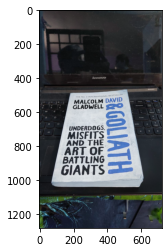

In [25]:
img=cv2.imread("/content/goliath (1).jpeg")
plt.imshow(img)
plt.show()



In [29]:
img =np.asarray(img)  # converted the tuple into a Numpy Array
img.shape

(1280, 720, 3)

You could use a perspective transform to obtain a top-down, “birds eye view” of an image — provided that you could find reference points, of course.

This post will continue the discussion on the top-down, “birds eye view” of an image. Following is a code to be used every single time you need to do a 4 point perspective transform.

* let’s define the order_points  function . This function takes a single argument, pts , which is a list of four points specifying the (x, y) coordinates of each point of the rectangle.
* It is absolutely crucial that we have a consistent ordering of the points in the rectangle. The actual ordering itself can be arbitrary, as long as it is consistent throughout the implementation.
*  We will specify the 4 points in top-left, top-right, bottom-right, and bottom-left order.
*  we’ll find the top-left point, which will have the smallest x + y sum, and the bottom-right point, which will have the largest x + y sum.
* Of course, now we’ll have to find the top-right and bottom-left points. Here we’ll take the difference (i.e. x – y) between the points using the np.diff  function.
* The coordinates associated with the smallest difference will be the top-right points, whereas the coordinates with the largest difference will be the bottom-left points .
* Finally, we return our ordered functions to the calling function.


In [0]:
def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

# FUNCTION for the tranformatio Matrix M

* We start off by defining the four_point_transform  function which requires two arguments: image  and pts .
* The image  variable is the image we want to apply the perspective transform to. And the pts  list is the list of four points that contain the ROI of the image we want to transform.
* We make a call to our order_points  function, which places our pts  variable in a consistent order. We then unpack these coordinates for convenience.
* Now we need to determine the dimensions of our new warped image.
* We determine the width of the new image, where the width is the largest distance between the bottom-right and bottom-left x-coordinates or the top-right and top-left x-coordinates.
* In a similar fashion, we determine the height of the new image on, where the height is the maximum distance between the top-right and bottom-right y-coordinates or the top-left and bottom-left y-coordinates.
* we define 4 points representing our “top-down” view of the image. The first entry in the list is (0, 0)  indicating the top-left corner. The second entry is (maxWidth - 1, 0)  which corresponds to the top-right corner. Then we have (maxWidth - 1, maxHeight - 1)  which is the bottom-right corner. Finally, we have (0, maxHeight - 1)  which is the bottom-left corner.
* The takeaway here is that these points are defined in a consistent ordering representation — and will allow us to obtain the top-down view of the image.
* To actually obtain the top-down, “birds eye view” of the image we’ll utilize the cv2.getPerspectiveTransform. This function requires two arguments, rect , which is the list of 4 ROI points in the original image, and dst , which is our list of transformed points. 
* The cv2.getPerspectiveTransform  function returns M , which is the actual transformation matrix.
* We apply the transformation matrix on using the cv2.warpPerspective  function. We pass in the image , our transform matrix M , along with the width and height of our output image.
* The output of cv2.warpPerspective  is our warped  image, which is our top-down view.
* We return this top-down view on to the calling function.


In [0]:
def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

# Final Function
>Now that we have code to perform the transformation, we need some code to drive it and actually apply it to images.

* The first thing we’ll do is import our four_point_transform  function
* WE will then add CODE (Katyani) to extract 4 point from the image
* Pyimagesearch has used argpsarse for reading the co ordinates from the command line.
* We then load the image and convert the points to a NumPy array .
> The actual CODE must extract the 4 corners fomr the image auomatically. (Katyanis CODE)
* Next, we can apply our perspective transform.
*Finally, let’s display the original image and the warped, top-down view of the image
